<a href="https://colab.research.google.com/github/sert121/bharatsim_code/blob/main/Final_Steps_Plot_Lat_Long_Shp_files_Checks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


%cd works to change directory not !cs


In [ ]:
%cd /content/drive/MyDrive/PhD_Data/Synth_Pop/Mumbai/

/content/drive/MyDrive/PhD_Data/Synth_Pop/Mumbai


In [ ]:
!pwd

/content/drive/MyDrive/PhD_Data/Synth_Pop/Mumbai


# Reset the colab default UTC to IST time



In [ ]:
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Asia/Kolkata /etc/localtime
!date

Tue Jun 22 18:41:30 IST 2021


In [ ]:
!ls -lth

total 7.3G
-rw------- 1 root root 2.4M Jun 14 11:51  Mumbai_Synthpop_v1_1_Sample_10k.csv
-rw------- 1 root root 2.2K May 26 20:56  Mumbai_Ward_Wise_Stats_Updated.csv
-rw------- 1 root root 2.2K May 26 19:26  Mumbai_Ward_Wise_Stats.csv
-rw------- 1 root root 578M May 25 18:36  Mumbai_Synthpop_v1_2.tar.gz
-rw------- 1 root root 2.4M May 25 18:32  Mumbai_Synthpop_v1_2_Sample_10k.csv
-rw------- 1 root root 3.0G May 25 18:27  Mumbai_Synthpop_v1_2.csv
drwx------ 2 root root 4.0K May 25 12:39 'Test Data'
drwx------ 2 root root 4.0K May 23 15:07  checkpoints
-rw------- 1 root root 488M May 23 15:05  Mumbai_Synthpop_v1_1.tar.gz
-rw------- 1 root root 2.9G May 23 14:58  Mumbai_Synthpop_v1_1.csv
-rw------- 1 root root 446M May 23 11:38  Mumbai_Synthpop_v1.tar.gz


In [ ]:
# %cd ../

/content/drive/My Drive/PhD_Data/Synth_Pop/Mumbai


In [ ]:
!ls -ltr

total 7574349
-rw------- 1 root root  466852682 May 23 11:38  Mumbai_Synthpop_v1.tar.gz
-rw------- 1 root root 3044384665 May 23 14:58  Mumbai_Synthpop_v1_1.csv
-rw------- 1 root root    2445574 May 23 15:04  Mumbai_Synthpop_v1_1_Sample_10k.csv
-rw------- 1 root root  511081398 May 23 15:05  Mumbai_Synthpop_v1_1.tar.gz
drwx------ 2 root root       4096 May 23 15:07  checkpoints
drwx------ 2 root root       4096 May 25 12:39 'Test Data'
-rw------- 1 root root 3123529329 May 25 18:27  Mumbai_Synthpop_v1_2.csv
-rw------- 1 root root    2509734 May 25 18:32  Mumbai_Synthpop_v1_2_Sample_10k.csv
-rw------- 1 root root  605319747 May 25 18:36  Mumbai_Synthpop_v1_2.tar.gz


In [ ]:
# test_df = pd.read_csv("mumbai_apply_final_fixes.csv", delimiter=',', skiprows=0, low_memory=False)

# Regression on Age for Height, Weight- From Kshitij

In [ ]:
ihds_df = pd.read_stata("/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Source_Files/36151-0001-Data.dta")
columns_to_keep = ['RO3', 'RO5', 'HHID', 'HHSPLITID', 'ID11', 'ID13', 'AP5', 'AP8', 'STATEID', 'DISTRICT', 'PSUID', 'MB4', 'MB5', 'MB6', 'MB7', 'MB8', 'MB9', 'MB10', 'MB11', 'MB12', 'MB13', 'MB14', 'MB15', 'MB16', 'MB17']
columns_rename_dict = {'RO3': 'Sex', 'RO5': 'Age', 'HHID': 'HHID', 'ID11': 'Religion', 'ID13': 'Caste', 'AP5': 'Height', 'AP8': 'Weight', 'STATEID': 'State', 'DISTID': 'District', 'PSUID': 'PSUID', 'MB4': 'M_Fever', 'MB5': 'M_Cough', 'MB6': 'M_Diarrhea', 'MB7': 'M_Cataract', 'MB8': 'M_TB', 'MB9': 'M_High_BP', 'MB10': 'M_Heart_disease', 'MB11': 'M_Diabetes', 'MB12': 'M_Leprosy', 'MB13': 'M_Cancer', 'MB14': 'M_Asthma', 'MB15': 'M_Polio', 'MB16': 'M_Paralysis', 'MB17': 'M_Epilepsy'}
ihds_df = ihds_df[columns_to_keep].rename(columns=columns_rename_dict)

In [ ]:
boundary_ihds_df = ihds_df[ihds_df['DISTRICT']=='Pune']
boundary_ihds_df = boundary_ihds_df[['Age', 'Height', 'Weight', 'Sex']].dropna().reset_index(drop=True)

In [ ]:
boundary_ihds_age_male_subset = boundary_ihds_df[boundary_ihds_df['Sex']=='Male 1']
boundary_ihds_age_female_subset = boundary_ihds_df[boundary_ihds_df['Sex']=='Female 2']

In [ ]:
female_weights_poly = np.polyfit(pow(boundary_ihds_age_female_subset['Age'], 1/4), boundary_ihds_age_female_subset['Weight'], deg=8)
female_heights_poly = np.polyfit(pow(boundary_ihds_age_female_subset['Age'], 1/4), boundary_ihds_age_female_subset['Height'], deg=8)
male_weights_poly = np.polyfit(pow(boundary_ihds_age_male_subset['Age'], 1/4), boundary_ihds_age_male_subset['Weight'], deg=8)
male_heights_poly = np.polyfit(pow(boundary_ihds_age_male_subset['Age'], 1/4), boundary_ihds_age_male_subset['Height'], deg=8)

In [ ]:
female_index = df['SexLabel']=='Female'

female_weights = np.polyval(female_weights_poly, pow(df[female_index]['Age'].apply(lambda x : min(x,75)),1/4))
female_weights = np.round(female_weights+np.random.normal(0, 0.5, size = female_weights.shape), 2)

df.loc[female_index, 'Weight'] = female_weights

In [ ]:
male_index = df['SexLabel']=='Male'
male_weights = np.polyval(female_weights_poly, pow(df[male_index]['Age'].apply(lambda x : min(x,75)),1/4))
male_weights = np.round(male_weights+np.random.normal(0, 0.5, size = male_weights.shape), 2) + 5


df.loc[male_index, 'Weight'] = male_weights

# Install geopandas

In [ ]:
!pip3 install geopandas

     |████████████████████████████████| 1.0MB 13.8MB/s 
     |████████████████████████████████| 15.4MB 286kB/s 
     |████████████████████████████████| 6.6MB 34.0MB/s 


# Load Packages

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Extract/Create the csv

In [ ]:
!ls -lth 

total 7.8G
-rw------- 1 root root 576M Jun 22 18:54  Mumbai_Synthpop_v1_3.tar.gz
-rw------- 1 root root 2.4M Jun 14 11:51  Mumbai_Synthpop_v1_1_Sample_10k.csv
-rw------- 1 root root 2.2K May 26 20:56  Mumbai_Ward_Wise_Stats_Updated.csv
-rw------- 1 root root 2.2K May 26 19:26  Mumbai_Ward_Wise_Stats.csv
-rw------- 1 root root 578M May 25 18:36  Mumbai_Synthpop_v1_2.tar.gz
-rw------- 1 root root 2.4M May 25 18:32  Mumbai_Synthpop_v1_2_Sample_10k.csv
-rw------- 1 root root 3.0G May 25 18:27  Mumbai_Synthpop_v1_2.csv
drwx------ 2 root root 4.0K May 25 12:39 'Test Data'
drwx------ 2 root root 4.0K May 23 15:07  checkpoints
-rw------- 1 root root 488M May 23 15:05  Mumbai_Synthpop_v1_1.tar.gz
-rw------- 1 root root 2.9G May 23 14:58  Mumbai_Synthpop_v1_1.csv
-rw------- 1 root root 446M May 23 11:38  Mumbai_Synthpop_v1.tar.gz


In [ ]:
!tar czvf Mumbai_Synthpop_v1_3.tar.gz ./checkpoints/Mumbai_Synthpop_2021_05_25-10:59:19_PM

./checkpoints/Mumbai_Synthpop_2021_05_25-10:59:19_PM


# Load data

In [ ]:
source_df = pd.read_csv("/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Source_Files/Maharashtra_IHDS_2011-12.csv")

In [ ]:
# df = pd.read_csv("Mumbai_Synthpop_v1_2.csv", delimiter=',', skiprows=0, low_memory=False)
df = pd.read_csv("./checkpoints/Mumbai_Synthpop_2021_05_25-10:59:19_PM", delimiter=',', skiprows=0, low_memory=False)

#Takes around 1 min 36 sec sec for Mumbai

In [ ]:
# sample_df = pd.read_csv("Mumbai_Synthetic_v1_Sample_10k.csv", delimiter=',', skiprows=0, low_memory=False)

In [ ]:
# source_df.info()
# sample_df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12439611 entries, 0 to 12439610
Data columns (total 44 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Age                        int64  
 1   Height                     float64
 2   Weight                     float64
 3   PSUID                      int64  
 4   M_Fever                    int64  
 5   M_Cough                    int64  
 6   M_Diarrhea                 int64  
 7   M_Cataract                 int64  
 8   M_TB                       int64  
 9   M_High_BP                  int64  
 10  M_Heart_disease            int64  
 11  M_Diabetes                 int64  
 12  M_Leprosy                  int64  
 13  M_Cancer                   int64  
 14  M_Asthma                   int64  
 15  M_Polio                    int64  
 16  M_Paralysis                int64  
 17  M_Epilepsy                 int64  
 18  SexLabel                   object 
 19  StateLabel                 object 
 20  

In [ ]:
pop_size = df.shape[0]

# Splittign HHID for keeping sizes reasonable: special case for Mumbai

In [ ]:
df.sort_values(by='HHID', kind='mergesort', inplace=True)
max_hid = max(df['HHID'])+1
df['HHID'] = pd.concat([df['HHID'].apply(lambda x : max_hid+x).iloc[::2], df['HHID'].iloc[1::2]])

In [ ]:
# df[['HHID','Age','SexLabel']][-50:]

df[df['HHID'] == 51902752521]

,SexLabel,Age,Religion,Caste,HHID,H_Lat,H_Lon,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,JobLabel,JobID,essential_worker,PublicTransport_Jobs,Adherence_to_Intervention,WorksAtSameCategory,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,StateLabel,PSUID,Agent_ID,District,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy,Weight,Height
2138387,Male,36,buddhist,SC,51902752521,18.97554,72.85008,E,18.971878,72.831327,Construction,95,0,1,0.0,True,2001000016072,18.98617,72.84597,0,NaN,NaN,3001000004360,19.10716,72.92555,Maharashtra,10,5.190214e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,57.96,161.55
2138389,Female,37,buddhist,SC,51902752521,18.97554,72.85008,E,18.971878,72.831327,Homebound,156,0,1,0.0,True,0,NaN,NaN,0,NaN,NaN,3001000001090,19.05975,72.83491,Maharashtra,1,5.190214e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,52.93,152.29
2138391,Male,71,buddhist,SC,51902752521,18.97554,72.85008,E,18.971878,72.831327,Ag labour,63,0,1,1.0,True,2001000042965,19.08593,72.88035,0,NaN,NaN,3001000000139,19.05610,72.89174,Maharashtra,14,5.190214e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,55.30,160.68
2138393,Female,57,buddhist,SC,51902752521,18.97554,72.85008,E,18.971878,72.831327,Homebound,156,0,1,0.9,True,0,NaN,NaN,0,NaN,NaN,3001000003535,18.96449,72.84238,Maharashtra,6,5.190214e+10,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,51.22,153.23
9788729,Female,15,buddhist,SC,51902752521,18.97554,72.85008,E,18.971878,72.831327,Student,199,0,1,0.4,NaN,0,NaN,NaN,2001000041277,19.19726,72.85300,3001000003857,18.98184,72.82470,Maharashtra,1,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,39.70,142.11
9788731,Male,13,buddhist,SC,51902752521,18.97554,72.85008,E,18.971878,72.831327,Student,199,0,1,0.8,NaN,0,NaN,NaN,2001000028187,19.02724,72.89949,3001000003432,19.20736,72.84609,Maharashtra,19,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,39.47,147.57
9788733,Female,4,buddhist,SC,51902752521,18.97554,72.85008,E,18.971878,72.831327,Student,199,0,1,1.0,NaN,0,NaN,NaN,2001000008011,19.18139,72.85885,3001000003647,19.14335,72.94984,Maharashtra,19,NaN,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,13.32,85.05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12439611 entries, 8313125 to 2049036
Data columns (total 45 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   SexLabel                   object 
 1   Age                        int64  
 2   Religion                   object 
 3   Caste                      object 
 4   HHID                       int64  
 5   H_Lat                      float64
 6   H_Lon                      float64
 7   AdminUnitName              object 
 8   AdminUnitLatitude          float64
 9   AdminUnitLongitude         float64
 10  JobLabel                   object 
 11  JobID                      int64  
 12  essential_worker           int64  
 13  PublicTransport_Jobs       int64  
 14  Adherence_to_Intervention  float64
 15  WorksAtSameCategory        object 
 16  WorkPlaceID                int64  
 17  W_Lat                      float64
 18  W_Lon                      float64
 19  school_id                  int64  


# Rename Columns

In [ ]:
df.rename(columns={'age': 'Age', 'gender': 'SexLabel'}, inplace=True)
df.rename(columns={'religion': 'Religion', 'caste': 'Caste'}, inplace=True)
df.rename(columns={'district': 'District', 'household_id': 'HHID'}, inplace=True)

# Delete Columns

In [ ]:
# del df['Unnamed: 0']
# del df['literacy']

# del df['residence'] 

# del df['geog'] 
# del df['working']

# del df['WorksAtSameCategory']

# Add Columns

In [ ]:
df['StateLabel']='Maharashtra'

In [ ]:
# Add PSUID column

df['PSUID'] = pd.Series(np.random.randint(1, 24, size=pop_size))

In [ ]:
df['Agent_ID'] = pd.Series(range(0, pop_size, 1)) + 51900000000

# df['District'] = 'Mumbai'

#Update Column

In [ ]:
df['HHID'] = df['HHID'] + 51900000000   # First 3 digits is District Code: Pune- 998, Mumbai- 519

#Adding Co-Morbs

In [ ]:
# Add comorbs in the same proportion as in source- Maharashtra in IHDS-II

# Takes around 34 sec

'''
var = source_df.groupby(['M_Fever']).agg({'M_Fever': ['count']}).apply(lambda x: x/x.sum())
df['M_Fever'] = pd.Series(var['M_Fever'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Fever']).agg({'M_Fever': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Fever']).agg({'M_Fever': ['count']}).apply(lambda x: x/x.sum()))


var = source_df.groupby(['M_Cough']).agg({'M_Cough': ['count']}).apply(lambda x: x/x.sum())
df['M_Cough'] = pd.Series(var['M_Cough'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Cough']).agg({'M_Cough': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Cough']).agg({'M_Cough': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_Diarrhea']).agg({'M_Diarrhea': ['count']}).apply(lambda x: x/x.sum())
df['M_Diarrhea'] = pd.Series(var['M_Diarrhea'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Diarrhea']).agg({'M_Diarrhea': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Diarrhea']).agg({'M_Diarrhea': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_Cataract']).agg({'M_Cataract': ['count']}).apply(lambda x: x/x.sum())
df['M_Cataract'] = pd.Series(var['M_Cataract'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Cataract']).agg({'M_Cataract': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Cataract']).agg({'M_Cataract': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_TB']).agg({'M_TB': ['count']}).apply(lambda x: x/x.sum())
df['M_TB'] = pd.Series(var['M_TB'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_TB']).agg({'M_TB': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_TB']).agg({'M_TB': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_High_BP']).agg({'M_High_BP': ['count']}).apply(lambda x: x/x.sum())
df['M_High_BP'] = pd.Series(var['M_High_BP'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_High_BP']).agg({'M_High_BP': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_High_BP']).agg({'M_High_BP': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_Heart_disease']).agg({'M_Heart_disease': ['count']}).apply(lambda x: x/x.sum())
df['M_Heart_disease'] = pd.Series(var['M_Heart_disease'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Heart_disease']).agg({'M_Heart_disease': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Heart_disease']).agg({'M_Heart_disease': ['count']}).apply(lambda x: x/x.sum()))


var = source_df.groupby(['M_Diabetes']).agg({'M_Diabetes': ['count']}).apply(lambda x: x/x.sum())
df['M_Diabetes'] = pd.Series(var['M_Diabetes'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Diabetes']).agg({'M_Diabetes': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Diabetes']).agg({'M_Diabetes': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_Leprosy']).agg({'M_Leprosy': ['count']}).apply(lambda x: x/x.sum())
df['M_Leprosy'] = pd.Series(var['M_Leprosy'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Leprosy']).agg({'M_Leprosy': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Leprosy']).agg({'M_Leprosy': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_Cancer']).agg({'M_Cancer': ['count']}).apply(lambda x: x/x.sum())
df['M_Cancer'] = pd.Series(var['M_Cancer'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Cancer']).agg({'M_Cancer': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Cancer']).agg({'M_Cancer': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_Asthma']).agg({'M_Asthma': ['count']}).apply(lambda x: x/x.sum())
df['M_Asthma'] = pd.Series(var['M_Asthma'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Asthma']).agg({'M_Asthma': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Asthma']).agg({'M_Asthma': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_Polio']).agg({'M_Polio': ['count']}).apply(lambda x: x/x.sum())
df['M_Polio'] = pd.Series(var['M_Polio'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Polio']).agg({'M_Polio': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Polio']).agg({'M_Polio': ['count']}).apply(lambda x: x/x.sum()))

var = source_df.groupby(['M_Paralysis']).agg({'M_Paralysis': ['count']}).apply(lambda x: x/x.sum())
df['M_Paralysis'] = pd.Series(var['M_Paralysis'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Paralysis']).agg({'M_Paralysis': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Paralysis']).agg({'M_Paralysis': ['count']}).apply(lambda x: x/x.sum()))

'''
var = source_df.groupby(['M_Epilepsy']).agg({'M_Epilepsy': ['count']}).apply(lambda x: x/x.sum())
df['M_Epilepsy'] = pd.Series(var['M_Epilepsy'].sample(n=pop_size,weights="count",replace=True).index)

print(source_df.groupby(['M_Epilepsy']).agg({'M_Epilepsy': ['count']}).apply(lambda x: x/x.sum()))
print(df.groupby(['M_Epilepsy']).agg({'M_Epilepsy': ['count']}).apply(lambda x: x/x.sum()))


           M_Epilepsy
                count
M_Epilepsy           
Cured        0.001801
No           0.982529
Yes          0.015670
           M_Epilepsy
                count
M_Epilepsy           
Cured        0.001810
No           0.982509
Yes          0.015681


# Update Religion value to Capital case (hindu --> Hindu)

In [ ]:
df['Religion'] = df['Religion'].replace(['christian'], 'Christian')
df['Religion'] = df['Religion'].replace(['hindu'], 'Hindu')
df['Religion'] = df['Religion'].replace(['jain'], 'Jain')
df['Religion'] = df['Religion'].replace(['muslim'], 'Muslim')
df['Religion'] = df['Religion'].replace(['sikh'], 'Sikh')

#Update SexLabel value to Capital case (male --> Male)

In [ ]:
df['SexLabel'] = df['SexLabel'].replace(['male'], 'Male')
df['SexLabel'] = df['SexLabel'].replace(['female'], 'Female')

In [ ]:
df.head()

,SexLabel,Age,Religion,Caste,HHID,H_Lat,H_Lon,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,JobLabel,JobID,essential_worker,PublicTransport_Jobs,Adherence_to_Intervention,WorksAtSameCategory,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,StateLabel,PSUID,Agent_ID,District,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy
0,Male,41,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2.001000e+12,19.038877,72.881458,NaN,NaN,NaN,3001000003866,18.994719,72.859246,Maharashtra,2,5.190000e+10,Mumbai,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
1,Male,44,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.9,True,2.001000e+12,19.006767,72.839661,NaN,NaN,NaN,3001000000187,19.083750,72.882348,Maharashtra,16,5.190000e+10,Mumbai,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Female,39,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Loaders,97,1,1,0.0,True,2.001000e+12,19.019421,72.913071,NaN,NaN,NaN,3001000001887,19.103728,72.830115,Maharashtra,7,5.190000e+10,Mumbai,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Female,36,Hindu,SC,51902097582,18.986606,72.852748,F/S,19.005878,72.839688,Ag labour,63,0,1,0.0,True,2.001000e+12,19.021740,72.906383,NaN,NaN,NaN,3001000002375,19.033971,72.875532,Maharashtra,10,5.190000e+10,Mumbai,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,Male,41,Hindu,SC,51902100136,19.020086,72.861478,F/N,19.029420,72.854606,Construction,95,0,1,0.9,True,2.001000e+12,18.983487,72.819453,NaN,NaN,NaN,3001000000926,19.113840,72.927938,Maharashtra,22,5.190000e+10,Mumbai,No,No,No,No,No,No,No,No,No,No,No,No,No,No


# Round off Lat,Lon to 5 decimal points

In [ ]:
# df['AdminUnitLatitude'] = df['AdminUnitLatitude'].apply(lambda x:round(x,5))
# df['AdminUnitLongitude'] = df['AdminUnitLongitude'].apply(lambda x:round(x,5))

# Co-Morbs (No, Cured --> 0) (Yes --> 1)

In [ ]:
# Takes around 1 m 2s
# Need to be careful in future to replace it on the entire dataframe- should be done on specific columns
df['M_Epilepsy'] = df['M_Epilepsy'].replace(['No', 'Cured'], 0)
df['M_Epilepsy'] = df['M_Epilepsy'].replace(['Yes'], 1)

# Plots for Age, Height, Weight






Text(0.5, 1.0, 'Age vs Weight in Sample Synthpop 10k Mumbai')

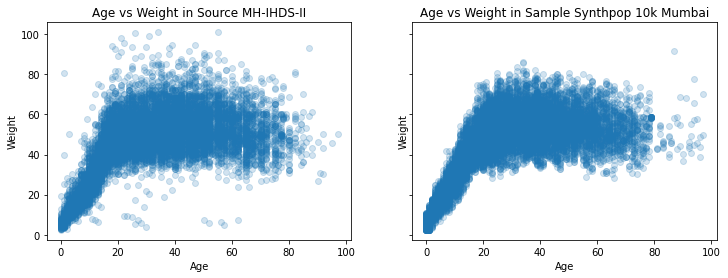

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4),sharey=True)
fig.suptitle('Comparison of Age vs Height')

sns.regplot(ax=axes[0], x = "Age", y='Weight', data=source_df, fit_reg = False, scatter_kws={"alpha": 0.2})
axes[0].set_title('Age vs Weight in Source MH-IHDS-II')

sns.regplot(ax=axes[1], x = "Age", y='Weight', data=df.sample(n=10000), fit_reg = False, scatter_kws={"alpha": 0.2})
axes[1].set_title('Age vs Weight in Sample Synthpop 10k Mumbai')

Text(0.5, 1.0, 'Age vs Height in Sample Synthpop 10k Mumbai')

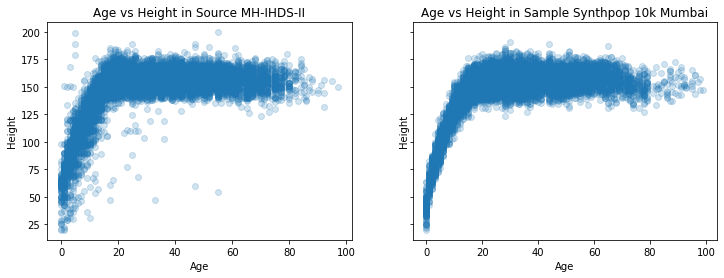

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4),sharey=True)
# fig.suptitle('Comparison of Age vs Height')

sns.regplot(ax=axes[0], x = "Age", y='Height', data=source_df, fit_reg = False, scatter_kws={"alpha": 0.2})
axes[0].set_title('Age vs Height in Source MH-IHDS-II')

sns.regplot(ax=axes[1], x = "Age", y='Height', data=df.sample(n=10000), fit_reg = False, scatter_kws={"alpha": 0.2})
axes[1].set_title('Age vs Height in Sample Synthpop 10k Mumbai')

Text(0.5, 1.0, 'Height vs Weight in Sample Synthpop 10k Mumbai')

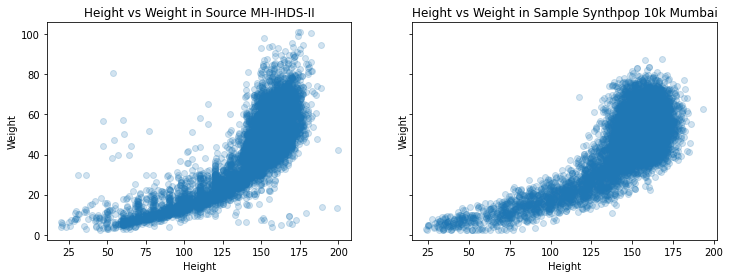

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4),sharey=True)
# fig.suptitle('Comparison of Age vs Height')

sns.regplot(ax=axes[0], x = "Height", y='Weight', data=source_df, fit_reg = False, scatter_kws={"alpha": 0.2})
axes[0].set_title('Height vs Weight in Source MH-IHDS-II')

sns.regplot(ax=axes[1], x = "Height", y='Weight', data=df.sample(n=10000), fit_reg = False, scatter_kws={"alpha": 0.2})
axes[1].set_title('Height vs Weight in Sample Synthpop 10k Mumbai')

# Spread the weigths across age groups- manually

In [ ]:
# for age in range(0,5):
  # max = source_df[source_df['Age'] == age]['Weight'].max()
  # min = source_df[source_df['Age'] == age]['Weight'].min()
  # mean = source_df[source_df['Age'] == age]['Weight'].mean()

  # df.loc[(df.Weight < min) | (df.Weight > ), 'Weight'] = np.random.triangular(min, mean, max, size=
  # mul = (df['Age'] == age).astype(int)


In [ ]:
df.info()

In [ ]:
# for age in (10, 100):
for age in range(13, 100):
  my_std = source_df[source_df['Age']==age]['Weight'].std()

  if(~np.isnan(my_std)):   
    min = source_df[source_df['Age']==age]['Weight'].quantile(0.01)
    max = source_df[source_df['Age']==age]['Weight'].quantile(0.99)
    
    low_lim = source_df[source_df['Age']==age]['Weight'].quantile(0.25)
    mid_lim = source_df[source_df['Age']==age]['Weight'].quantile(0.50)
    high_lim = source_df[source_df['Age']==age]['Weight'].quantile(0.75)


    df.loc[(df.Age == age) & (df.Weight < min), 'Weight'] = np.random.uniform(low_lim, mid_lim, size=len(df.loc[(df.Age == age) & (df.Weight < min)]))
    df.loc[(df.Age == age) & (df.Weight > max), 'Weight'] = np.random.uniform(mid_lim, high_lim, size=len(df.loc[(df.Age == age) & (df.Weight > max)]))


# df.loc[df.Height <10 , 'Height'] = df.loc[df.Height <10 , 'Height'] + 20
# df.loc[df.Height <17 , 'Height'] = df.loc[df.Height <17 , 'Height'] + 10

In [ ]:
# source_df[source_df['Age']==21]['Weight'].quantile(0.01)

35.002000350954205

In [ ]:
source_df[source_df['Age']==21]['Weight'].describe()

count    183.000000
mean      50.353005
std        9.902673
min       31.900000
25%       42.799999
50%       49.000000
75%       56.099998
max       98.199997
Name: Weight, dtype: float64

In [ ]:
# df[df['Age']==11]['Weight'].describe()

df[(df['Age']==51) & (df['Weight'] <10 )]

# Spread the distribtution of height with age

In [ ]:
# age = 20
# len_1 = 10000 # for sample_df
len_1 = pop_size # for full df for Greater Mumbai
height_var = 0

min_height = df['Height'].min()

for age in range(0,98):
  # print(age)
  # mul = (sample_df['Age'] == age).astype(int)
  mul = (df['Age'] == age).astype(int)


  mean = df[df['Age'] == age]['Height'].mean()
  
  # if(mean != 0):
  #   prev_mean = mean
  
  # if(mean <= 0):
  #   mean = prev_mean
  #   print ("\n mean for",age,"is=",mean,"\n")

  if(age>=75 or age < 18):
  #     var = 1.5 *var
    height_var = df[df['Age'] == age]['Height'].std() 
    height_var = height_var + np.random.default_rng().wald(2, 5 * height_var)
  else: 
    height_var = df[df['Age'] == age]['Height'].std()
    height_var = height_var + np.random.default_rng().wald(2, height_var)

  # var = df[df['Age'] == age]['Height'].std() 

  # var = var + np.random.default_rng().wald(2, var)


  if (~np.isnan(height_var)):# and var > 0):
    pre_var = height_var  
    
  # mean = sample_df[sample_df['Age'] == age]['Height'].mean()
  if (np.isnan(height_var)): # or var <=0):
    height_var = pre_var
    print ("\n Var for",age,"is=",pre_var,"\n")
    # print("C...\n")
    # continue

  # if(age>=80 or age < 18):
  #     var = 1.5 *var
  # elif(age>=75 and age<80):
  #     var = 10 *var

  data = np.random.normal(0,height_var,size=len_1)
  # data = np.random.default_rng().wald(mean, var, len_1)

  # print(age,var,"\n")
  # sample_df['Height'] = sample_df['Height']+pd.Series(data*mul)
  df['Height'] = df['Height']+pd.Series(data*mul)

# df[df['Height'] < min_height]['Height'] = min_height

df.loc[df.Height < min_height, 'Height'] = min_height


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#Plot for Age, Weight


NameError: ignored

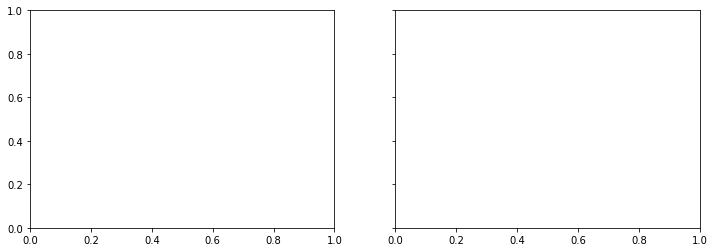

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4),sharey=True)
# fig.suptitle('Comparison of Age vs Height')

sns.regplot(ax=axes[0], x = "Age", y="Height", data=source_df, fit_reg = False, scatter_kws={"alpha": 0.2})
axes[0].set_title('Age vs Height in Source IHDS-II for MH')

sns.regplot(ax=axes[1], x = "Age", y="Height", data=sample_df, fit_reg = False, scatter_kws={"alpha": 0.2})
axes[1].set_title('Age vs Height in Sample Synthpop 10k Mumbai')

Text(0.5, 1.0, 'Age vs Weight in Sample Synthpop 10k Mumbai')

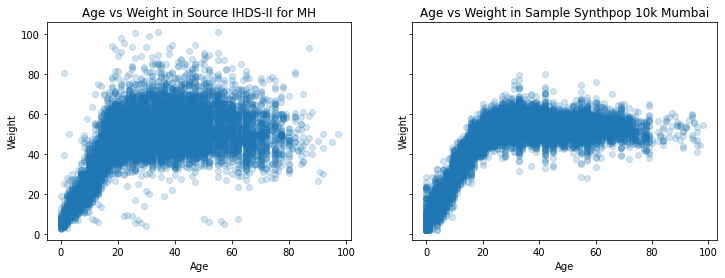

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4),sharey=True)
# fig.suptitle('Comparison of Age vs Weight')

sns.regplot(ax=axes[0], x = "Age", y="Weight", data=source_df, fit_reg = False, scatter_kws={"alpha": 0.2})
axes[0].set_title('Age vs Weight in Source IHDS-II for MH')

sns.regplot(ax=axes[1], x = "Age", y="Weight", data=sample_df, fit_reg = False, scatter_kws={"alpha": 0.2})
axes[1].set_title('Age vs Weight in Sample Synthpop 10k Mumbai')

In [ ]:
df['Weight'].describe(), df['Height'].describe(), df['Age'].describe()

(count    1.243961e+07
 mean     4.687085e+01
 std      1.354138e+01
 min     -3.100000e+01
 25%      4.326000e+01
 50%      5.097000e+01
 75%      5.552000e+01
 max      9.474000e+01
 Name: Weight, dtype: float64, count    1.243961e+07
 mean     1.467094e+02
 std      2.416487e+01
 min      8.610000e+00
 25%      1.437700e+02
 50%      1.529500e+02
 75%      1.602700e+02
 max      2.120300e+02
 Name: Height, dtype: float64, count    1.243961e+07
 mean     3.151048e+01
 std      1.880614e+01
 min      0.000000e+00
 25%      1.700000e+01
 50%      2.900000e+01
 75%      4.400000e+01
 max      9.900000e+01
 Name: Age, dtype: float64)

# Spread the distribtution of weight with age

Text(0.5, 1.0, 'Height vs Weight in Sample Synthpop 10k Mumbai')

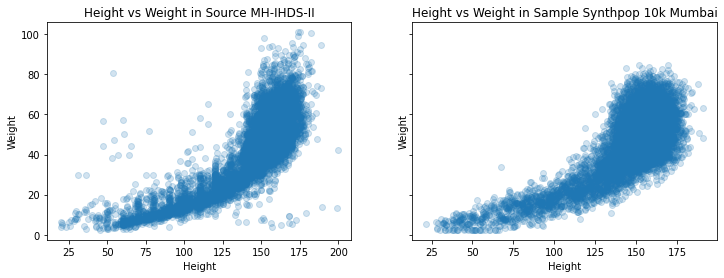

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4),sharey=True)
# fig.suptitle('Height/Weight')

sns.regplot(ax=axes[0], x = "Height", y="Weight", data=source_df, fit_reg = False, scatter_kws={"alpha": 0.2})
axes[0].set_title('Height vs Weight in Source MH-IHDS-II')

sns.regplot(ax=axes[1], x = "Height", y="Weight", data=df.sample(n=10000), fit_reg = False, scatter_kws={"alpha": 0.2})
axes[1].set_title('Height vs Weight in Sample Synthpop 10k Mumbai')

In [ ]:
# if(age>=75 or age < 18):
  # if age < 5:
  # #     var = 1.5 *var
  #   var = source_df[source_df['Age'] == age]['Weight'].std()

    # var = var + np.random.default_rng().wald(2, 5 * var)

"""
  if age < 5:
    var = var * 0.8 + np.random.default_rng().wald(1, var)
  elif age >=5 & age <=10:  
    var = var + np.random.default_rng().wald(1, var)
  elif age > 10 & age < 18:
    var = var + np.random.default_rng().wald(1, var)
  elif age >= 18 & age < 60:
    var = var * 0.8  
  elif age>=75:  
    var = var + np.random.default_rng().wald(1, var)
"""

In [ ]:
# age = 20
# len_1 = 10000 # for sample_df
len_1 = len(df) # for full df
pop_size = len_1

var = 0

for age in range(0,98):
  # print(age)
  # mul = (sample_df['Age'] == age).astype(int)
  mul = (df['Age'] == age).astype(int)


  # mean = df[df['Age'] == age]['Weight'].mean()

  var = source_df[source_df['Age'] == age]['Weight'].std()

  
  if (~np.isnan(var)):
    pre_var = var  
    
  # mean = sample_df[sample_df['Age'] == age]['Height'].mean()
  if np.isnan(var):
    var = pre_var
    # print ("\n Var for",age,"is=",var,"\n")
    # print("C...\n")
    # continue

  data = np.random.normal(0,var,size=len_1)

  # print(age,var,"\n")
  # sample_df['Height'] = sample_df['Height']+pd.Series(data*mul)
  df['Weight'] = df['Weight']+pd.Series(data*mul)


min_weight_from_source = source_df['Weight'].min()
df.loc[df.Weight <min_weight_from_source , 'Weight'] = min_weight_from_source


In [ ]:
# df[df['Height'] < 20]
# source_df[source_df['Height'] < 20]

# df.loc[df.Height <10 , 'Height'] = df.loc[df.Height <10 , 'Height'] + 20
# df.loc[df.Height <17 , 'Height'] = df.loc[df.Height <17 , 'Height'] + 10

# Replace multiple values in a column by condition

In [ ]:
# Get minimum from MH-IHDS-II(Source)

min_weight_from_source = source_df['Weight'].min()

# min_height_from_source = source_df['Height'].min()

# min_height_from_source

# Replace the negative values with the minimum of IHDS for height and weight

df.loc[df.Weight <min_weight_from_source , 'Weight'] = min_weight_from_source

# df.loc[df.Height < min_height_from_source , 'Height'] = min_height_from_source

# Histograms for Age, weight and height

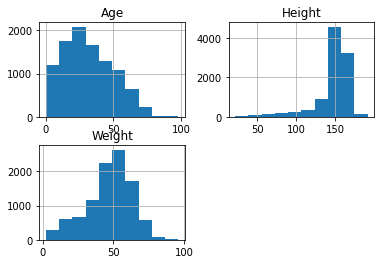

In [ ]:
df_ahw = sample_df[['Age','Height','Weight']]
df_ahw.hist(bins=10)
plt.style.use('ggplot')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffba800d910>,
      dtype=object)

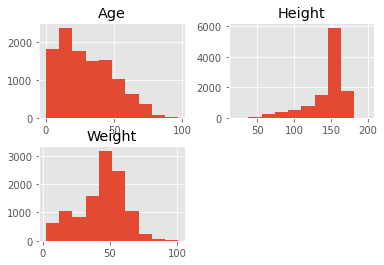

In [ ]:
source_df_ahw = source_df[['Age','Height','Weight']]
source_df_ahw.hist(bins=10)


# Female to male household wise shift

In [ ]:
df[(df['Age'] < 5)].mean()

In [ ]:
source_df['Weight'].describe(), df['Weight'].describe()

(count    11104.000000
 mean        43.821938
 std         16.926100
 min          2.400000
 25%         34.500000
 50%         46.700001
 75%         55.299999
 max        101.000000
 Name: Weight, dtype: float64, count    1.243961e+07
 mean     4.704414e+01
 std      1.582969e+01
 min      2.400000e+00
 25%      3.845882e+01
 50%      4.933360e+01
 75%      5.799448e+01
 max      1.308095e+02
 Name: Weight, dtype: float64)

In [ ]:
source_df['Height'].describe(), df['Height'].describe()

(count    11104.000000
 mean       144.661924
 std         25.323976
 min         20.000000
 25%        141.199997
 50%        152.000000
 75%        160.000000
 max        199.500000
 Name: Height, dtype: float64, count    1.243961e+07
 mean     1.467095e+02
 std      2.416416e+01
 min      1.700000e+01
 25%      1.437700e+02
 50%      1.529500e+02
 75%      1.602700e+02
 max      2.120300e+02
 Name: Height, dtype: float64)

In [ ]:
# df['SexLabel'].value_counts()/len(df)

df[(df['Age'] >= 0 & df['Age'] < 18)
df['SexLabel'].value_counts()/len(df)

Female    0.518431
Male      0.481569
Name: SexLabel, dtype: float64

In [ ]:
# df.head()
subset = df[(df['Age'] >= 20) & (df['Age'] < 60)]

In [ ]:
subset_M = subset[subset['SexLabel'] == 'Male']
subset_F = subset[subset['SexLabel'] == 'Female']

In [ ]:
M_by_HH = subset_M.groupby('HHID').size()
F_by_HH = subset_F.groupby('HHID').size()

In [ ]:
common_index = M_by_HH.index.intersection(F_by_HH.index)

In [ ]:
(M_by_HH.loc[common_index] < F_by_HH.loc[common_index]).value_counts()

False    2067138
True      409475
dtype: int64

In [ ]:
# our_index = common_index[M_by_HH.loc[common_index] < F_by_HH.loc[common_index]]

In [ ]:
# our_index

In [ ]:
female_filter =  (df['SexLabel'] == 'Female') & (df['Age'] >= 20) & (df['Age'] < 60)  

In [ ]:
# df[female_filter].shape
final_filter = pd.Series(np.random.uniform(size=len(df)) < 0.1, index=df.index)

In [ ]:
convert_to_male_filter = final_filter & female_filter

In [ ]:
df.loc[convert_to_male_filter, 'SexLabel'] = 'Male'

In [ ]:
df[df['SexLabel']].value_counts()

In [ ]:
# import tqdm

In [ ]:
# update_list = [pd.Series(df[(df['HHID'] == loop_in) & female_filter].index).sample(n=1).iloc[0] for loop_in in tqdm.tqdm(our_index)] 

# for loop_in in tqdm.tqdm(our_index):
  # update_list.append(pd.Series(df[(df['HHID'] == loop_in) & female_filter].index).sample(n=1).iloc[0])
# [pd.Series(df[(df['HHID'] == loop_in) & female_filter].index).sample(n=1).iloc[0]]  

In [ ]:
# family = df[df['HHID'] == our_index[0]]

# family[family['SexLabel'] == 'Female']

,Age,Height,Weight,PSUID,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy,SexLabel,StateLabel,Religion,Caste,District,JobLabel,JobID,essential_worker,PublicTransport_Jobs,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,H_Lat,H_Lon,HHID,Agent_ID,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,Adherence_to_Intervention
69,24,156.88,52.72,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Female,Maharashtra,Hindu,other,Mumbai,Homebound,0,0,1,K/E,19.120092,72.852387,19.11377,72.87211,51900000025,51903886147,0,NaN,NaN,0,NaN,NaN,3001000002463,19.16502,72.85674,0.3
75,29,148.73,48.37,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Female,Maharashtra,Hindu,other,Mumbai,Homebound,0,0,0,K/E,19.120092,72.852387,19.11377,72.87211,51900000025,51903886153,0,NaN,NaN,0,NaN,NaN,3001000001569,19.16972,72.86297,0.2
77,47,162.91,51.75,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Female,Maharashtra,Hindu,other,Mumbai,Carpenters,81,0,1,K/E,19.120092,72.852387,19.11377,72.87211,51900000025,51903886155,2001000030261,19.168,72.86515,0,NaN,NaN,3001000000273,18.94904,72.83670,0.9


In [ ]:
df[(df['HHID']==51900000066) & (df['Age'] >= 20) & (df['Age'] < 60)][['Age','SexLabel','JobLabel']]

,Age,SexLabel,JobLabel
221,36,Male,Construction
223,33,Female,Homebound
225,58,Female,Homebound


In [ ]:
# df[(df['JobLabel'] == 'Homebound') & (df['Age'] >= 20) & (df['Age'] < 60)]['SexLabel'].value_counts() 

Female    2722732
Male       439270
Name: SexLabel, dtype: int64

In [ ]:
# df['SexLabel'].value_counts()/ len(df)
df[df['JobLabel']=='Homebound']['SexLabel'].value_counts() / len(df)

Female    0.251050
Male      0.081312
Name: SexLabel, dtype: float64

# Histogram for SexLabel

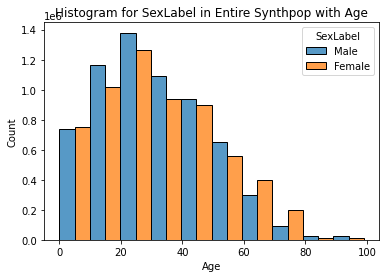

In [ ]:
plt.figure(figsize=(6,4))
# plt.ylim([0, 800])
plt.title("Histogram for SexLabel in Entire Synthpop with Age")
myplot = sns.histplot(data=df , x="Age", hue="SexLabel", multiple="dodge", bins=10)

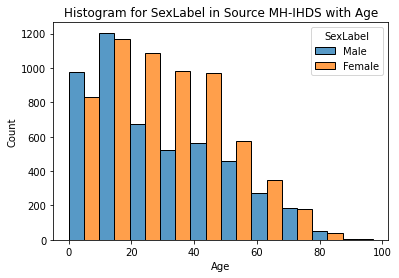

In [ ]:
plt.figure(figsize=(6,4))
# plt.ylim([0, 800])
plt.title("Histogram for SexLabel in Source MH-IHDS with Age")
myplot = sns.histplot(data=source_df , x="Age", hue="SexLabel", multiple="dodge", bins=10)

# Histogram for Age, Weight and Height

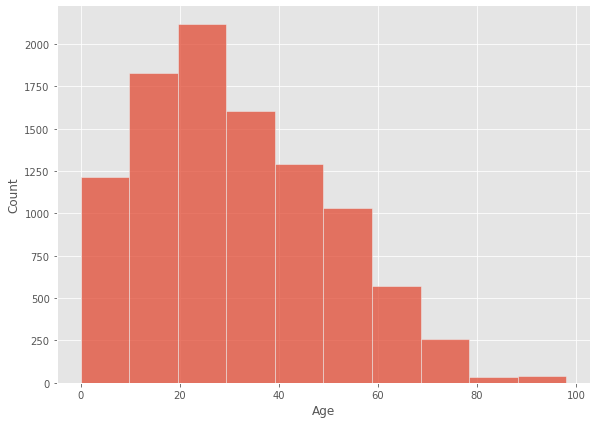

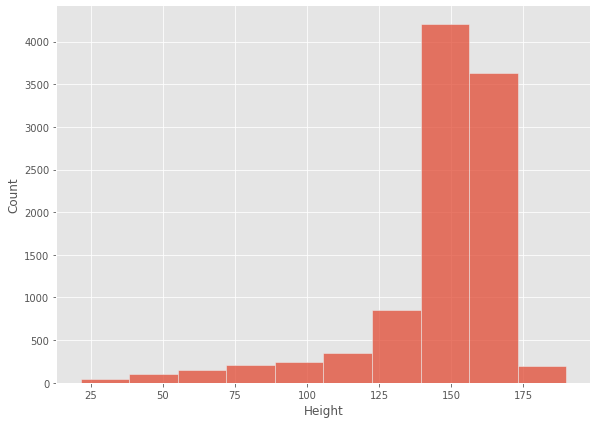

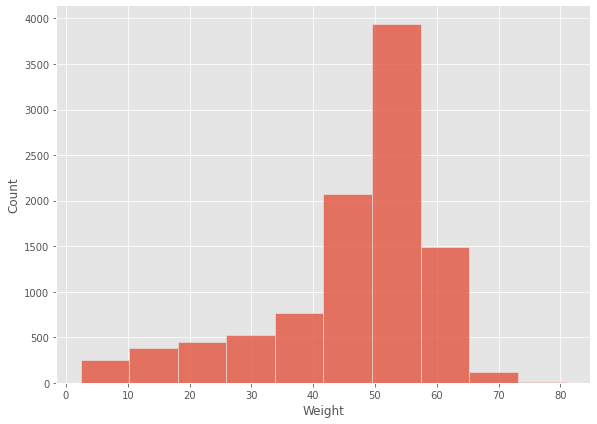

In [ ]:
sns.displot(data=df_ahw['Age'], kind='hist',
            height=6, aspect=1.4, bins=10)
sns.displot(data=df_ahw['Height'], kind='hist',
            height=6, aspect=1.4, bins=10)
sns.displot(data=df_ahw['Weight'], kind='hist',
            height=6, aspect=1.4, bins=10)


In [ ]:
df['Age'].describe(), df['Height'].describe(), df['Weight'].describe()

(count    1.243961e+07
 mean     3.151048e+01
 std      1.880614e+01
 min      0.000000e+00
 25%      1.700000e+01
 50%      2.900000e+01
 75%      4.400000e+01
 max      9.900000e+01
 Name: Age, dtype: float64, count    1.243961e+07
 mean     1.467094e+02
 std      2.416487e+01
 min      8.610000e+00
 25%      1.437700e+02
 50%      1.529500e+02
 75%      1.602700e+02
 max      2.120300e+02
 Name: Height, dtype: float64, count    1.243961e+07
 mean     4.704414e+01
 std      1.582969e+01
 min      2.400000e+00
 25%      3.845882e+01
 50%      4.933360e+01
 75%      5.799448e+01
 max      1.308095e+02
 Name: Weight, dtype: float64)

# Set decimal points to 3 while printing in notebook

In [ ]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Histogram of students in school

In [ ]:
# plt.hist(sample_df[sample_df['school_id']>0]['Age'])
# plot_school_df = sample_df[sample_df['school_id']>0]['Age']
myplot = sns.histplot(data=sample_df[sample_df['school_id']>0] , x="Age", bins=10)

NameError: ignored

# Update datatype of WorkPlaceID, school_id, Agent_ID

In [ ]:
# df[['WorkPlaceID']] = df[['WorkPlaceID']].astype(pd.Int64Dtype())
# df[['school_id']] = df[['school_id']].astype(pd.Int64Dtype())
# df[['Agent_ID']] = df[['Agent_ID']].astype(pd.Int64Dtype())

# df[['M_Epilepsy']] = df[['M_Epilepsy']].astype(pd.Int64Dtype())

# Round off Weight and Height to 2 decimal points

In [ ]:
# replace it with np.round method
df['Height'] = df['Height'].apply(lambda x:round(x,2))
df['Weight'] = df['Weight'].apply(lambda x:round(x,2))

# Check data

In [ ]:
# df['WorkPlaceID'].describe()

# df['WorkPlaceID'].isnull().values.any()
# df['WorkPlaceID'].isnull().sum().sum()

# df['WorkPlaceID'].isnull().T.any().T.sum()

# WorkPlaceID,school_id (nan-->0)

In [ ]:
# sample_df['WorkPlaceID'] = sample_df['WorkPlaceID'].fillna(0)
df['WorkPlaceID'] = df['WorkPlaceID'].fillna(0)

# sample_df['school_id'] = sample_df['school_id'].fillna(0)
df['school_id'] = df['school_id'].fillna(0)

# Verify WorkPlaceID, school_id (nan --> 0)

In [ ]:
df[np.isnan(df['WorkPlaceID'])]
# df[np.isnan(df['school_id'])]


,SexLabel,Age,Religion,Caste,HHID,H_Lat,H_Lon,AdminUnitName,AdminUnitLatitude,AdminUnitLongitude,JobLabel,JobID,essential_worker,PublicTransport_Jobs,Adherence_to_Intervention,WorksAtSameCategory,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,StateLabel,PSUID,Agent_ID,District,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy,Weight,Height


# Student JobLabel

In [ ]:
df.info()

In [ ]:
df[(df['WorkPlaceID'] == 0) & (df['school_id']!=0)]

In [ ]:
# If wokplaceid=0, and school_id != 0, then assign JobLabel: Student, JobID: 199

df['JobLabel'] = np.where((df['WorkPlaceID'] == 0) & (df['school_id'] != 0) , "Student", df['JobLabel'])
df.loc[df.JobLabel == "Student", 'JobID'] = 199

In [ ]:
# For Age=0, 1, 2, 3 JobLabel=Homebound

df['JobLabel'] = np.where((df['Age'] == 0), "Homebound", df['JobLabel'])
# df['JobLabel'] = np.where((df['Age'] == 1), "Homebound", df['JobLabel'])
# df['JobLabel'] = np.where((df['Age'] == 2), "Homebound", df['JobLabel'])
# df['JobLabel'] = np.where((df['Age'] == 3), "Homebound", df['JobLabel'])


In [ ]:
# for homebound people JobID

df.loc[df.JobLabel == "Homebound", 'JobID'] = 0

In [ ]:
# for homebound people- School_id=0, school_lat=nan, school_long=nan, workplace_id=0, W_LAT, W_LON, essential worker=0

df.loc[df.JobLabel == "Homebound", ['essential_worker', 'WorkPlaceID', 'W_Lat', 'W_Lon', 'school_id', 'school_lat', 'school_long' ]] = [0, 0, np.nan, np.nan, 0, np.nan, np.nan]

# Check household sizes

In [ ]:
hh_size = df.groupby(['HHID', 'H_Lat', 'H_Lon']).size().reset_index(name='counts')

In [ ]:
# hh_size[hh_size['counts']==1]
hh_size['counts'].value_counts()


4     858021
3     698699
5     534799
2     343981
6     265648
7     108077
9      63016
1      58743
10     25653
8      17597
12     14263
11       427
Name: counts, dtype: int64

# Verify 

In [ ]:
# print((sample_df.groupby('Religion').agg({'JobLabel': ['count']})))
# df[df['Age'] == 0]['school_id'].describe()
df[df['Age'] < 3]['JobLabel'].describe()
# df[df['Age'] < 3]['JobLabel'].unique()

count        426914
unique            1
top       Homebound
freq         426914
Name: JobLabel, dtype: object

In [ ]:
# sample_df[sample_df['JobLabel']=='Homebound']['WorkPlaceID']
df[df['JobLabel']=='Homebound']['school_lat'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: school_lat, dtype: float64

In [ ]:
# sample_df[sample_df['JobLabel']=='Homebound']['school_id']
df[df['JobLabel']=='Student'].describe()
# df['Age'].describe()

,Age,Height,Weight,PSUID,M_Fever,M_Cough,M_Diarrhea,M_Cataract,M_TB,M_High_BP,M_Heart_disease,M_Diabetes,M_Leprosy,M_Cancer,M_Asthma,M_Polio,M_Paralysis,M_Epilepsy,JobID,essential_worker,PublicTransport_Jobs,AdminUnitLatitude,AdminUnitLongitude,H_Lat,H_Lon,HHID,Agent_ID,WorkPlaceID,W_Lat,W_Lon,school_id,school_lat,school_long,public_place_id,public_place_lat,public_place_long,Adherence_to_Intervention
count,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2887006.0,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2887006.0,2.887006e+06,2.887006e+06,2887006.0,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2887006.0,0.0,0.0,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06,2.887006e+06
mean,1.158142e+01,1.327420e+02,3.352757e+01,1.199684e+01,4.419804e-04,1.807236e-02,2.990988e-03,7.174561e-03,0.0,1.842740e-04,6.630052e-03,8.721838e-04,1.762379e-03,1.900931e-03,1.537579e-03,0.0,1.166607e-03,1.566398e-02,199.0,1.582574e-02,9.865882e-01,1.909452e+01,7.286438e+01,1.909731e+01,7.286644e+01,7.788645e+10,5.191069e+10,0.0,NaN,NaN,2.001000e+12,1.909931e+01,7.287110e+01,3.001000e+12,1.909980e+01,7.286994e+01,7.466671e-01
std,4.154930e+00,2.013772e+01,1.199600e+01,6.636016e+00,2.101869e-02,1.332132e-01,5.460808e-02,8.439839e-02,0.0,1.357351e-02,8.115477e-02,2.951988e-02,4.194370e-02,4.355822e-02,3.918183e-02,0.0,3.413570e-02,1.241718e-01,0.0,1.248010e-01,1.150302e-01,7.480968e-02,3.469774e-02,8.148784e-02,3.871937e-02,2.595136e+10,1.002410e+06,0.0,NaN,NaN,1.490913e+04,7.355046e-02,3.780019e-02,1.451996e+03,7.589750e-02,3.743879e-02,2.378362e-01
min,4.000000e+00,6.086000e+01,7.000929e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,199.0,0.000000e+00,0.000000e+00,1.893377e+01,7.281316e+01,1.889476e+01,7.277790e+01,5.190000e+10,5.190898e+10,0.0,NaN,NaN,2.001000e+12,1.890699e+01,7.278713e+01,3.001000e+12,1.890157e+01,7.277718e+01,4.000000e-01
25%,8.000000e+00,1.199600e+02,2.382183e+01,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,199.0,0.000000e+00,1.000000e+00,1.905611e+01,7.284231e+01,1.903644e+01,7.283720e+01,5.190138e+10,5.190984e+10,0.0,NaN,NaN,2.001000e+12,1.904817e+01,7.284123e+01,3.001000e+12,1.904375e+01,7.284085e+01,4.000000e-01
50%,1.200000e+01,1.369700e+02,3.368819e+01,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,199.0,0.000000e+00,1.000000e+00,1.908511e+01,7.285239e+01,1.909475e+01,7.285874e+01,1.038028e+11,5.191065e+10,0.0,NaN,NaN,2.001000e+12,1.909378e+01,7.286523e+01,3.001000e+12,1.909654e+01,7.286310e+01,8.000000e-01
75%,1.500000e+01,1.479500e+02,4.244530e+01,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,199.0,0.000000e+00,1.000000e+00,1.913903e+01,7.287909e+01,1.916159e+01,7.289109e+01,1.038041e+11,5.191163e+10,0.0,NaN,NaN,2.001000e+12,1.915467e+01,7.289867e+01,3.001000e+12,1.915887e+01,7.289644e+01,1.000000e+00
max,1.800000e+01,1.862800e+02,7.613290e+01,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,199.0,1.000000e+00,1.000000e+00,1.923112e+01,7.295092e+01,1.926998e+01,7.297945e+01,1.038055e+11,5.191244e+10,0.0,NaN,NaN,2.001000e+12,1.926707e+01,7.297564e+01,3.001000e+12,1.926750e+01,7.297569e+01,1.000000e+00


In [ ]:
df['M_Fever'].describe()

count    1.243961e+07
mean     4.523453e-04
std      2.126360e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: M_Fever, dtype: float64

# Check df

In [ ]:
df['Age'].head()

In [ ]:
df.info()

In [ ]:
df.head()

# Verify Adherence_to_Intervention

In [ ]:
var1 = 'Adherence_to_Intervention'
print((df[var1].value_counts()))
print(df[var1][0:10])
print(df[var1].min())
df[var1].max()

# Verify students

In [ ]:
# JobLabel: Student, JobID: 199 W_LAT and W_LON should be nan

print(df[(df.WorkPlaceID==0) & (df.school_id!=0)]['JobID'].describe())

# for homebound people: School_id=0, school_lat=nan, school_long=nan, 
# workplace_id=0, W_LAT=nan, W_LON=nan, 
# essential worker=0

print(df[(df.WorkPlaceID==0) & (df.school_id==0)]['school_lat'].describe())
print(df[(df.WorkPlaceID==0) & (df.school_id==0)]['school_long'].describe())

print(df[(df.WorkPlaceID==0) & (df.school_id==0)]['WorkPlaceID'].describe())
print(df[(df.WorkPlaceID==0) & (df.school_id==0)]['W_Lat'].describe())
print(df[(df.WorkPlaceID==0) & (df.school_id==0)]['W_Lon'].describe())

print(df[(df.WorkPlaceID==0) & (df.school_id==0)]['essential_worker'].describe())

count    3029582.0
mean         199.0
std            0.0
min          199.0
25%          199.0
50%          199.0
75%          199.0
max          199.0
Name: JobID, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: school_lat, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: school_long, dtype: float64
count    4134458.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: WorkPlaceID, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: W_Lat, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: W_Lon, dtype: float64
count    4134458.0
mean           0.0
std            0.0
min            0.0
25%            0.0


[Code for plotting on map from](https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6)

[Group by and aggragates](https://jamesrledoux.com/code/group-by-aggregate-pandas)

Print M/F ratio for the entire dataset

In [ ]:
df.groupby('SexLabel').agg({'SexLabel': ['count']})
# Sex_Label_Summary = df.groupby('SexLabel').agg({'SexLabel': ['count']}).apply(lambda x: x/x.sum())
# Sex_Label_Summary.to_csv('/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Pune_Ward_SexLabel_Summary.csv') 

,SexLabel
,count
SexLabel,
Female,6449084
Male,5990527


In [ ]:
Sex_Label_Summary

,SexLabel
,count
SexLabel,
Female,0.518
Male,0.482


In [ ]:
Sex_Label_Summary.to_csv('/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Mumbai_SexLabel_Summary.csv') 

In [ ]:
# Count the no of wards in Mumbai- should be 24

len(df['AdminUnitName'].value_counts())
# df['AdminUnitName'].value_counts()
# df.shape
# len(sample_df['AdminUnitName'].value_counts())

24

#Ward-wise map of Mumbai


In [ ]:
# !pwd
!ls

mumbai_123.tar.gz			Mumbai_Synthpop_2021_05_23-02:29:38_PM
Mumbai_Add_Height_Weight_Homebound.csv	Mumbai_Synthpop_v1.csv
mumbai_apply_final_fixes.csv		Mumbai_Synthpop_v1.tar.gz


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12439611 entries, 8313125 to 2049036
Data columns (total 45 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   SexLabel                   object 
 1   Age                        int64  
 2   Religion                   object 
 3   Caste                      object 
 4   HHID                       int64  
 5   H_Lat                      float64
 6   H_Lon                      float64
 7   AdminUnitName              object 
 8   AdminUnitLatitude          float64
 9   AdminUnitLongitude         float64
 10  JobLabel                   object 
 11  JobID                      int64  
 12  essential_worker           int64  
 13  PublicTransport_Jobs       int64  
 14  Adherence_to_Intervention  float64
 15  WorksAtSameCategory        object 
 16  WorkPlaceID                int64  
 17  W_Lat                      float64
 18  W_Lon                      float64
 19  school_id                  int64  


# Save the current df on to the cloud 

In [ ]:
# !pwd
# %cd ./checkpoints/
!ls -lth ./checkpoints/

total 21G
-rw------- 1 root root 3.0G May 25 22:59 Mumbai_Synthpop_2021_05_25-10:59:19_PM
-rw------- 1 root root 3.0G May 25 18:10 Mumbai_Synthpop_2021_05_25-06:10:37_PM
-rw------- 1 root root 3.0G May 25 16:54 Mumbai_Synthpop_2021_05_25-04:54:26_PM
-rw------- 1 root root 3.0G May 25 15:56 Mumbai_Synthpop_2021_05_25-03:56:27_PM
-rw------- 1 root root 3.0G May 23 15:07 Mumbai_Synthpop_2021_05_23-02:29:38_PM.csv
-rw------- 1 root root 2.9G May 23 15:06 Mumbai_Synthpop_2021_05_23-02:52:27_PM.csv
-rw------- 1 root root  45M May 23 12:39 Mumbai_Add_Height_Weight_Homebound.csv
-rw------- 1 root root 2.7G May 23 10:18 mumbai_apply_final_fixes.csv
-rw------- 1 root root 668M May 23 06:13 mumbai_123.tar.gz


In [ ]:
from datetime import datetime

date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
fname = f"Mumbai_Synthpop_{date}"

df.to_csv(fname, index=False)

# Takes around 5 minutes

# Prepare ward-wise statistics

In [ ]:
!pwd

/content/drive/My Drive/PhD_Data/Synth_Pop/Mumbai


In [ ]:
df.info()

In [ ]:
# df.head()
ward_wise = df[['AdminUnitName', 'SexLabel', 'Age', 'Height', 'Weight', 'HHID', 'JobLabel','WorkPlaceID', 'W_Lat', 'W_Lon', 'essential_worker','PublicTransport_Jobs','school_id','school_lat', 'school_long', 'Adherence_to_Intervention']]

In [ ]:
# ward_wise.info()
ward_wise.groupby('AdminUnitName').count()


In [ ]:
# ward_T = ward_wise[ward_wise['AdminUnitName'] =='T']

In [ ]:
ward_T[ward_T['JobLabel']=='Homebound']
ward_T['Age'].mean()
ward_T['Height'].mean()
ward_T[ward_T['essential_worker']==1]
ward_T[ward_T['PublicTransport_Jobs']==1]

In [ ]:
# len(ward_T[ward_T['WorkPlaceID'] !=0]['WorkPlaceID'].unique())
# len(ward_T['HHID'].unique())
ward_T['Adherence_to_Intervention'].mean()

0.5782100665802082

# Get 10k synthpop from a ward

In [ ]:
ward_B = df[df['AdminUnitName'] =='B']

In [ ]:
ward_B.shape

(127266, 45)

In [ ]:
for_10k_HH = ward_B['HHID'].unique()[0:2500]

In [ ]:
ward_B_10k = ward_B[ward_B['HHID'].isin(for_10k_HH)]

ward_B_10k has 10349 rows with 2370 students, 4380 workers, 3599 homebound population
 

In [ ]:
ward_B_10k.info()

In [ ]:
# ward_B_10k[ward_B_10k['WorkPlaceID'] != 0].describe()
# ward_B_10k['WorkPlaceID']
ward_B_10k[ward_B_10k['JobLabel'] == 'Homebound']['school_id'].describe()

count    3599.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: school_id, dtype: float64

In [ ]:
!pwd

/content/drive/My Drive/PhD_Data/Synth_Pop/Mumbai


In [ ]:
ward_B_10k.to_csv("ward_B_10k.csv",index=False)


# Get ward-wise count of Households (unique)

In [ ]:
# ward_wise.groupby(['AdminUnitName'])['HHID'].unique().reset_index()
# .reset_index().to_csv("ward_wise_SexLabel.csv

ward_wise.groupby(['AdminUnitName']).agg({"HHID": "nunique"}).reset_index().to_csv("ward_wise_HH.csv")

In [ ]:
# ward_wise.groupby(['AdminUnitName', 'SexLabel']).count().reset_index().to_csv("ward_wise_SexLabel.csv")

# Get ward-wise count of Workplaces (unique)

In [ ]:
# ward_wise.groupby(['AdminUnitName', 'JobLabel'=='Homebound']).count()
ward_wise_wkplace = ward_wise[ward_wise['WorkPlaceID'] != 0]
# ward_wise_essential_worker = ward_wise[ward_wise['essential_worker'] == 1]

In [ ]:
ward_wise_wkplace.groupby(['AdminUnitName']).agg({"WorkPlaceID": "nunique"}).reset_index().to_csv("ward_wise_uniq_wkplace.csv")

# Get ward-wise count of Schools (unique)

---



In [ ]:
df.info()

In [ ]:
# ward_wise_school = ward_wise[ward_wise['school_id'] != 0]
ward_wise_wkplcae = ward_wise[ward_wise['WorkPlaceID'] != 0]

In [ ]:
# ward_wise_school.groupby(['school_id']).agg({"school_id": "nunique"}).reset_index().to_csv("ward_wise_uniq_schools.csv")

ward_wise_wkplcae_plot = ward_wise_wkplcae.groupby(['WorkPlaceID','W_Lat','W_Lon']).size().reset_index()

In [ ]:
# del gdf, geometry

In [ ]:
geometry = [Point(xy) for xy in zip(ward_wise_wkplcae_plot['W_Lon'], ward_wise_wkplcae_plot['W_Lat'])]
gdf_1 = GeoDataFrame(ward_wise_wkplcae_plot, geometry=geometry)  

In [ ]:
gdf_1['ward']='NA'

In [ ]:
# gdf_1=None, gdf=None 
# gdf=None
# gdf_1=None
# gdf_1.iloc[0][]
# geometry
gdf_1

,WorkPlaceID,W_Lat,W_Lon,0,geometry,ward
0,2001000000000,19.03551,72.84752,186,POINT (72.84752 19.03551),NA
1,2001000000001,19.04759,72.94171,4,POINT (72.94171 19.04759),NA
2,2001000000002,19.17242,72.93762,91,POINT (72.93762 19.17242),NA
3,2001000000003,19.06773,72.89867,6,POINT (72.89867 19.06773),NA
4,2001000000004,19.13743,72.86147,160,POINT (72.86147 19.13743),NA
...,...,...,...,...,...,...
50981,2001000051042,19.07252,72.91770,130,POINT (72.91770 19.07252),NA
50982,2001000051043,19.00052,72.89648,109,POINT (72.89648 19.00052),NA
50983,2001000051044,19.02642,72.85341,145,POINT (72.85341 19.02642),NA
50984,2001000051045,19.03415,72.93166,116,POINT (72.93166 19.03415),NA


In [ ]:
!ls ../Analysis/Source_Files/Mumbai_Ward_Shape_Files/

Mumbai.dbf  Mumbai.prj	Mumbai.shp  Mumbai.shx	mumbai_wards.geojson


In [ ]:
world = gpd.read_file('/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Source_Files/Mumbai_Ward_Shape_Files/mumbai_wards.geojson')

In [ ]:
import tqdm

In [ ]:
# dir(geometry[0])
# geometry[0].within(world.iloc[0]['geometry'])
count = []
for i in tqdm(range(len(geometry))):
  for j in range(len(world)):
    if geometry[i].within(world.iloc[j]['geometry']):
      count.append([gdf_1.loc[i]['WorkPlaceID'], world.iloc[j]['name']])

      # gdf_1.iloc[i]['ward'] = world.iloc[j]['name']
# world.iloc[1]['geometry']

# pd.DataFrame(count).to_csv("ward_wise_schools_loc.csv")

In [ ]:
# school_df = pd.DataFrame(count)
wkplace_df = pd.DataFrame(count)

In [ ]:
# %cd /content
!ls

 checkpoints			       Mumbai_Synthpop_v1_2.tar.gz
 Mumbai_Synthpop_v1_1.csv	       Mumbai_Synthpop_v1.tar.gz
 Mumbai_Synthpop_v1_1_Sample_10k.csv   Mumbai_Ward_Wise_Stats.csv
 Mumbai_Synthpop_v1_1.tar.gz	      'Test Data'
 Mumbai_Synthpop_v1_2.csv	       ward_wise_schools_loc.csv
 Mumbai_Synthpop_v1_2_Sample_10k.csv


In [ ]:
wkplace_df.groupby(1).count().to_csv("ward_wise_wkplace_loc")
# school_df.info()

In [ ]:
# world.iloc[1]['name']

'B'

# Get ward-wise count of essential workers


In [ ]:
ward_wise_school = ward_wise[ward_wise['essential_worker'] != 0]

In [ ]:
ward_wise_essential_worker.groupby(['AdminUnitName']).count().reset_index()[['AdminUnitName','SexLabel']].to_csv("ward_wise_essential_worker.csv")

In [ ]:
# ward_wise.count().reset_index().to_csv("ward_wise_count.csv", index=False)

In [ ]:
# ward_wise.mean().reset_index().to_csv("ward_wise_mean.csv", index=False)

# Prepare for gpd plots

In [ ]:
# !ls /content/drive/MyDrive/PhD_Data/Synth_Pop/

!ls /content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Mumbai

Mumbai_Household.jpg  Mumbai_School.jpg  Mumbai_Workplace.jpg


In [ ]:
world = gpd.read_file('/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Source_Files/Mumbai_Ward_Shape_Files/Mumbai.shp')

Plot School LatLon- For Mumbai takes around 11m 30s minutes


In [ ]:
# plot_sample_df = df.sample(n=10000)
# plot_sample_df = df
plot_sample_df = ward_B_10k

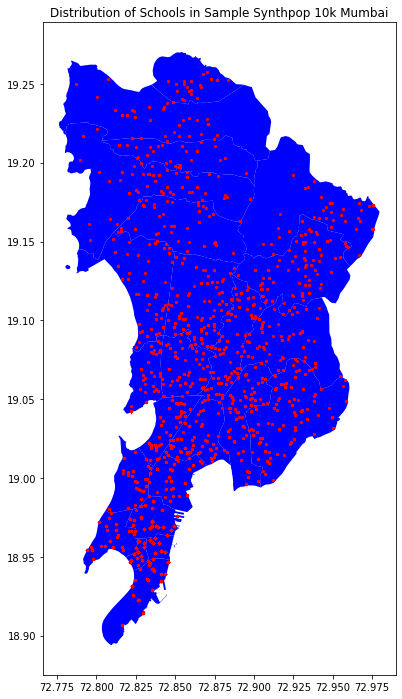

In [ ]:
geometry = [Point(xy) for xy in zip(plot_sample_df['school_long'], plot_sample_df['school_lat'])]
gdf = GeoDataFrame(plot_sample_df, geometry=geometry)  

#this is a  map of Mumbai ward-wise on which we plot the lat long for the given entity

gdf.plot(ax=world.plot(figsize=(20, 12), color='blue'), marker='o', color='red', markersize=5);

plt.title("Distribution of Schools in Sample Synthpop 10k Mumbai")
plt.savefig('/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Mumbai/Mumbai_School.jpg')

Plot Households LatLong- Current config takes around 3 minutes


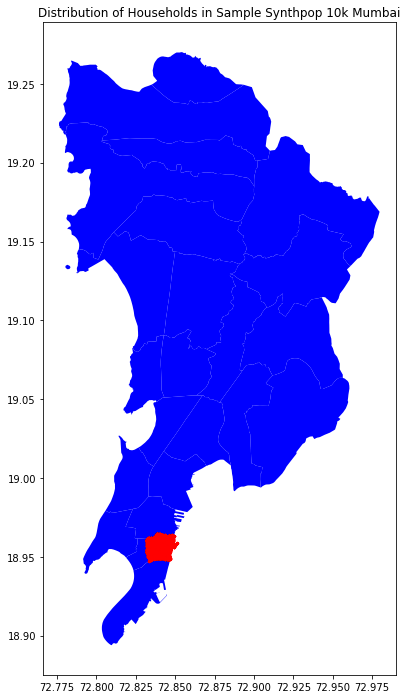

In [ ]:
geometry = [Point(xy) for xy in zip(plot_sample_df['H_Lon'], plot_sample_df['H_Lat'])]
gdf = GeoDataFrame(plot_sample_df, geometry=geometry)  

#this is a  map of Mumbai ward-wise on which we plot the lat long for the given entity

gdf.plot(ax=world.plot(figsize=(20, 12), color='blue'), marker='o', color='red', markersize=5);

plt.title("Distribution of Households in Sample Synthpop 10k Mumbai")
plt.savefig('/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Mumbai/Mumbai_Household.jpg')

Plot Workplace LatLong- Current config takes around 3 minutes

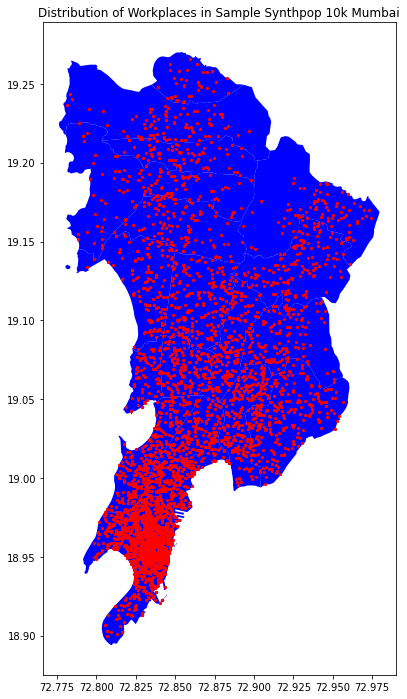

In [ ]:
geometry = [Point(xy) for xy in zip(plot_sample_df['W_Lon'], plot_sample_df['W_Lat'])]
gdf = GeoDataFrame(plot_sample_df, geometry=geometry)  

#this is a  map of Mumbai ward-wise on which we plot the lat long for the given geometry

gdf.plot(ax=world.plot(figsize=(20, 12), color='blue'), marker='o', color='red', markersize=5);

plt.title("Distribution of Workplaces in Sample Synthpop 10k Mumbai")
plt.savefig('/content/drive/MyDrive/PhD_Data/Synth_Pop/Analysis/Mumbai/Mumbai_Workplace.jpg')

# Finally save the df into the specified format and a 10k sample

In [ ]:
!pwd

Save the dataframe as CSV to the specified folder- Takes around 1 minute

In [ ]:
df.head()

In [ ]:
df[['Age', 'Height', 'Weight', 'PSUID' ,'M_Fever', 'M_Cough', 'M_Diarrhea',
       'M_Cataract', 'M_TB', 'M_High_BP', 'M_Heart_disease', 'M_Diabetes',
       'M_Leprosy', 'M_Cancer', 'M_Asthma', 'M_Polio', 'M_Paralysis',
       'M_Epilepsy', 'SexLabel', 'StateLabel', 'Religion', 'Caste', 'District',
       'JobLabel', 'JobID', 'essential_worker', 'PublicTransport_Jobs',
       'AdminUnitName', 'AdminUnitLatitude', 'AdminUnitLongitude', 'H_Lat',
       'H_Lon', 'HHID', 'Agent_ID', 'WorkPlaceID', 'W_Lat', 'W_Lon',
       'school_id', 'school_lat', 'school_long', 'public_place_id',
       'public_place_lat', 'public_place_long', 'Adherence_to_Intervention']].to_csv("Mumbai_Synthpop_v1_2.csv",index=False)

In [ ]:
df[['Age', 'Height', 'Weight', 'PSUID' ,'M_Fever', 'M_Cough', 'M_Diarrhea',
       'M_Cataract', 'M_TB', 'M_High_BP', 'M_Heart_disease', 'M_Diabetes',
       'M_Leprosy', 'M_Cancer', 'M_Asthma', 'M_Polio', 'M_Paralysis',
       'M_Epilepsy', 'SexLabel', 'StateLabel', 'Religion', 'Caste', 'District',
       'JobLabel', 'JobID', 'essential_worker', 'PublicTransport_Jobs',
       'AdminUnitName', 'AdminUnitLatitude', 'AdminUnitLongitude', 'H_Lat',
       'H_Lon', 'HHID', 'Agent_ID', 'WorkPlaceID', 'W_Lat', 'W_Lon',
       'school_id', 'school_lat', 'school_long', 'public_place_id',
       'public_place_lat', 'public_place_long', 'Adherence_to_Intervention']].sample(n=10000).to_csv("Mumbai_Synthpop_v1_2_Sample_10k.csv",index=False)